In [1]:
%pip install smogn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sklearn.calibration import LabelEncoder
import smogn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
import pandas as pd
from scipy.stats import skew

In [12]:
# Load dataset
df = pd.read_csv('../data/data.csv')

# Label encoding for 'Country' due to high dimensionality
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

# One-hot encoding for 'Region' due to low dimensionality
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)
df_encoded = df_encoded.astype(int)

# Separate features and target variable
X = df_encoded.drop(columns='Life_expectancy')
y = df_encoded['Life_expectancy']

# Apply Box-Cox transformation to the target (Life Expectancy)
# Box-Cox only accepts positive values, which are satisfied in life expectancy data
y_boxcox, lambda_val = boxcox(y)  # Store the lambda value for inverse transformation later if needed

# Updated feature matrix (X) and transformed target (y_boxcox)
X_transformed = X
y_transformed = pd.Series(y_boxcox, name="Life_expectancy_BoxCox")

skewness_original = skew(y)  # Skewness of original target
median_original = y.median()  # Median of original target
mean_origial = y.mean()  # Mean of original target

skewness_boxcox = skew(y_transformed)  # Skewness of Box-Cox transformed target

# Print results
print("Skewness before Box-Cox Transformation:", skewness_original)
print("Median before Box-Cox Transformation:", median_original)
print("Mean before Box-Cox Transformation:", mean_origial)
print("\n")
print("Skewness after Box-Cox Transformation:", skewness_boxcox)

Skewness before Box-Cox Transformation: -0.7677252641243315
Median before Box-Cox Transformation: 71.0
Mean before Box-Cox Transformation: 68.41131284916202


Skewness after Box-Cox Transformation: -0.18119433906548368


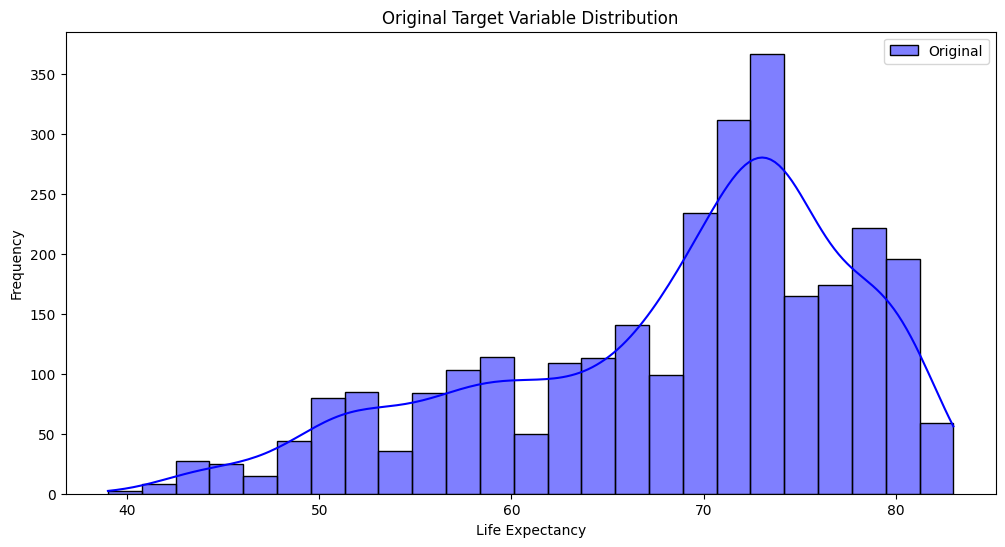

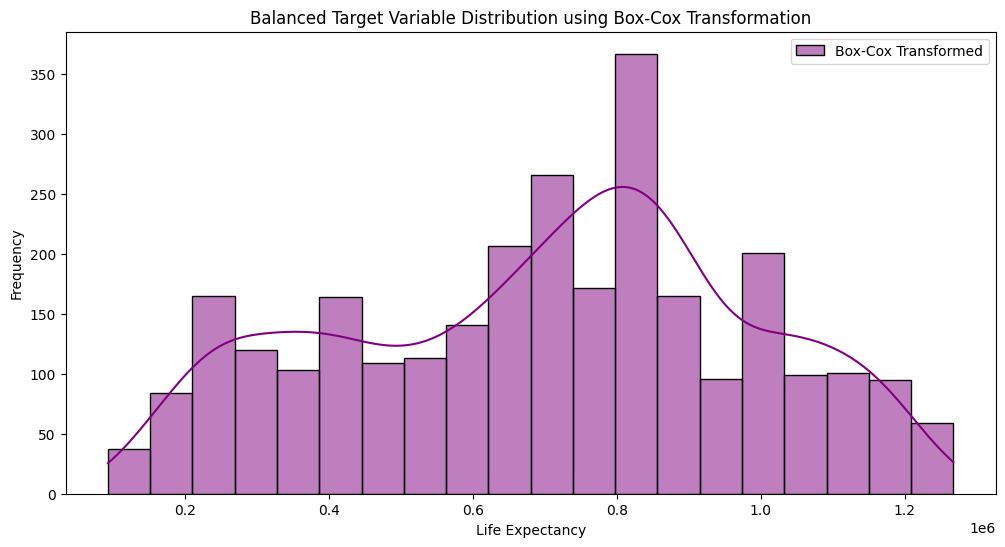

In [13]:
# Original target variable distribution
plt.figure(figsize=(12, 6))
sns.histplot(y, kde=True, color='blue', label='Original')
plt.title("Original Target Variable Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# After balancing
plt.figure(figsize=(12, 6))
sns.histplot(y_transformed, kde=True, color='purple', label='Box-Cox Transformed')
plt.title("Balanced Target Variable Distribution using Box-Cox Transformation")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()